# Funcion de error personalizada con Tensorflow

In [6]:
# <-- analytics -->
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# <-- machine learning -->
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from keras import datasets

# <-- deep learning -->
import tensorflow as tf
from keras import models
from keras import layers

## Huber loss

La función de pérdida de Huber describe la pena incurrida por un procedimiento de estimación f. Huber (1964) define la función de pérdida de forma fragmentada por:

$$ {\displaystyle L_{\delta }(y,h(x))={\begin{cases}{\frac {1}{2}}(y-h(x))^{2} \hspace{1.5cm} {\textrm {for}}|y-h(x)|\leq \delta ,\\\delta \,|y-h(x)|-{\frac {1}{2}}\delta ^{2} \hspace{5mm} {\textrm {otherwise.}}\end{cases}}}$$

Más información: https://en.wikipedia.org/wiki/Huber_loss

In [7]:
# Función que genera al función de pérdida de Huber
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

A continuación se representa gráficamente la función de pérdida de Huber en función del threshold seleccionado

In [8]:
# El valor más habitual para la función de pérdida de Huber es 1.0
huber_fn = create_huber(1.0)

<>:12: SyntaxWarning: invalid escape sequence '\_'
<>:12: SyntaxWarning: invalid escape sequence '\_'
/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_37743/2044618873.py:12: SyntaxWarning: invalid escape sequence '\_'
  plt.ylabel("$huber\_loss(0, z)$")


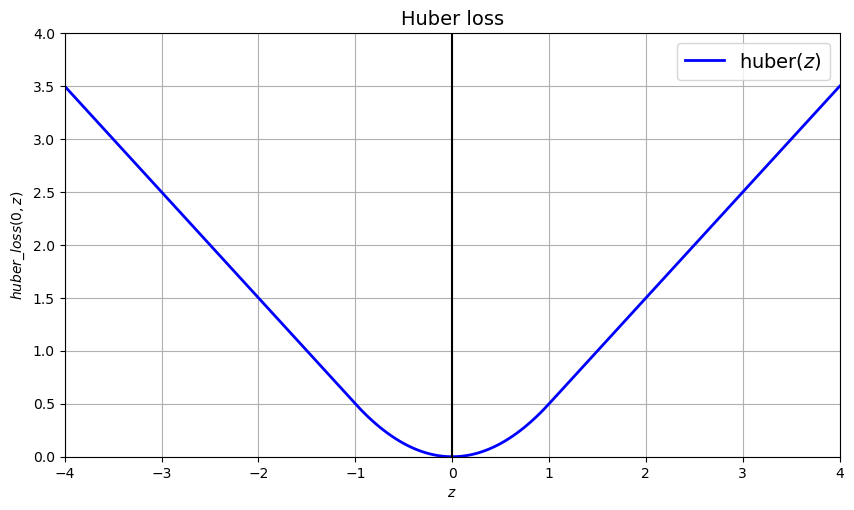

In [9]:
# Representación gráfica de la función de pérdida de Huber
plt.figure(figsize=(10, 5.5))

z = np.linspace(-4, 4, 200)

plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")

plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.ylabel("$huber\_loss(0, z)$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

## Entrenando una Red Neuronal Artificial con la nueva función de error

A continuación se pone en práctica la función de error definida en el apartado anterior en un ejercicio práctico. Para ello, se va a utilizar el caso de uso práctico de predicción del precio de una vivienda presentado en la sección de introducción a Keras

### Importando el conjunto de datos

In [10]:
boston_housing = datasets.boston_housing

In [11]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [12]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


### División del conjunto de datos

In [13]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

### Escalando el conjunto de datos

In [14]:
scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

### Definicion de la arquitectura de la Red Neuronal Artificial

In [30]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

/Users/cristianariel/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741 (2.89 KB)

 Trainable params: 741 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento de la Red Neuronal Artificial

#### Función de error utilizada en el ejercicio práctico de introducción a Keras

A continuación se muestra la representación gráfica de la evaluación de los valores resultantes de la función de error **_mean_squared_error_** durante el proceso de entrenamiento.

In [17]:
network.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mae']
               )

In [18]:
history = network.fit(X_train_prep, 
                      y_train, 
                      epochs=50, 
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 563.1220 - mae: 21.9892 - val_loss: 654.2863 - val_mae: 23.8106
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 593.2595 - mae: 22.3756 - val_loss: 635.2418 - val_mae: 23.3841
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 563.3715 - mae: 21.8435 - val_loss: 620.1785 - val_mae: 23.0361
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 549.2137 - mae: 21.5791 - val_loss: 605.2819 - val_mae: 22.6770
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 523.0816 - mae: 20.8702 - val_loss: 587.3477 - val_mae: 22.2392
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 506.1484 - mae: 20.3903 - val_loss: 565.3575 - val_mae: 21.7517
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 489.1475 - mae: 19.8298 - val_loss: 539.2938 - val_mae: 21.2427
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 484.5271 - mae: 19.8148 - val_loss: 507.4041 - val_mae: 20.6764
Epoch 9/50
13/13 ━━━━━━

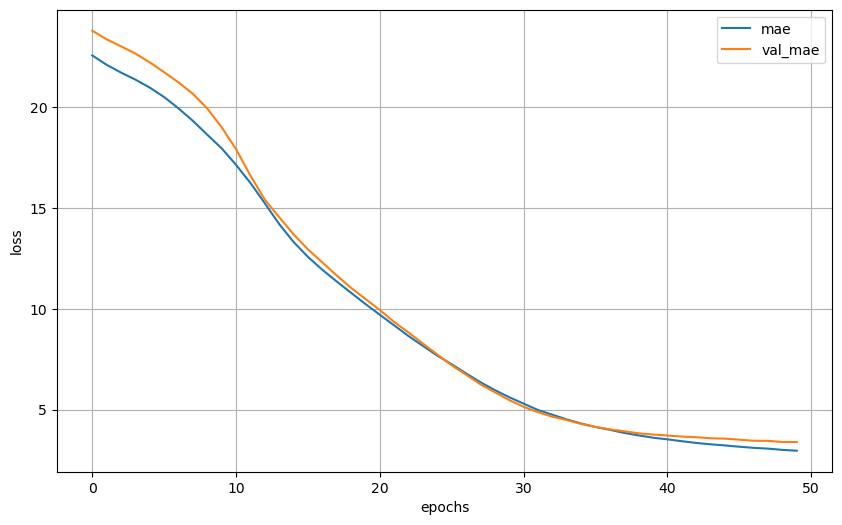

In [19]:
pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#### Evaluación de los resultados

In [20]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.9859 - mae: 3.8660 


In [21]:
print('test_mae:', test_mae)

test_mae: 3.8174211978912354


#### Función de error de Huber

A continuación se muestra la representación gráfica de la evaluación de los valores resultantes de la función de error de **_huber_** durante el proceso de entrenamiento.

In [22]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

/Users/cristianariel/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
network.compile(
    loss=create_huber(1.0),
    optimizer='adam',
    metrics=['mae']
               )

In [24]:
history = network.fit(X_train_prep, 
                      y_train, 
                      epochs=50, 
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 21.3105 - mae: 21.8105 - val_loss: 22.9684 - val_mae: 23.4684
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5494 - mae: 22.0494 - val_loss: 22.5701 - val_mae: 23.0701
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.3190 - mae: 21.8187 - val_loss: 22.1187 - val_mae: 22.6187
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.5448 - mae: 21.0444 - val_loss: 21.6069 - val_mae: 22.1054
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7927 - mae: 20.2918 - val_loss: 21.0347 - val_mae: 21.5270
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.7205 - mae: 19.2200 - val_loss: 20.5242 - val_mae: 21.0242
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3275 - mae: 18.8250 - val_loss: 19.9430 - val_mae: 20.4342
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6397 - mae: 18.1351 - val_loss: 19.2831 - val_mae: 19.7816
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

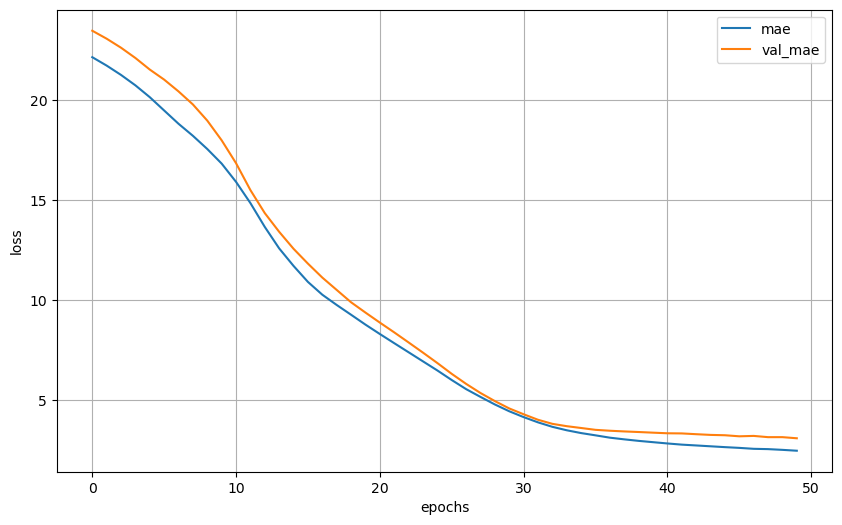

In [25]:
pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#### Evaluación de los resultados

In [26]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5505 - mae: 3.0208 


In [27]:
print('test_mae:', test_mae)

test_mae: 3.0607569217681885


## Guardando el modelo en disco con objetos personalizados

Cuando nuestro modelo contiene algún componente personalizado, debemos realizar el siguiente procedimiento para almacenar el modelo en disco e importarlo cuando sea necesario

In [28]:
# Guardamos el modelo en disco
network.save("modelo_huber_loss.h5")

In [29]:
# Importamos el modelo previamente guardado en disco
network2 = keras.models.load_model("modelo_huber_loss.h5",
                                    custom_objects={"huber_fn": create_huber(1.0)})

NameError: name 'keras' is not defined

In [35]:
history = network2.fit(X_train_prep, 
                      y_train, 
                      epochs=2, 
                      validation_data=(X_val_prep, y_val))

Epoch 1/2
13/13 [==============================] - 0s 12ms/step - loss: 2.1799 - mean_absolute_error: 2.6326 - val_loss: 3.8635 - val_mean_absolute_error: 4.3035
Epoch 2/2
13/13 [==============================] - 0s 3ms/step - loss: 2.1731 - mean_absolute_error: 2.6262 - val_loss: 3.8704 - val_mean_absolute_error: 4.3219
